In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import matplotlib.font_manager as fm
import matplotlib as mpl

plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['font.size'] = 23
datas = ['mini_test', 'crop','euro', 'isic', 'chest']
backbone = ['18', '34', '50', '101', '152']
print(mpl.rcParams['font.family'])
print(mpl.rcParams['font.size'])
print(mpl.matplotlib_fname())

['sans-serif']
23.0
/home/yujin/anaconda3/lib/python3.9/site-packages/matplotlib/mpl-data/matplotlibrc


In [91]:
result = pd.DataFrame(None, index=datas, columns=['1shot', '5shot'])
for data in result.index:
    for bs in result.columns:
        path = "./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_00{}_head_default/".format(data, bs)
        test_acc = pd.read_csv(path+"test_history.csv", index_col='Unnamed: 0')
        acc = '{:.2f} ± {:.2f}'.format(test_acc.mean()[-1] * 100,
                                         1.96 * test_acc.std()[-1] / np.sqrt(600) * 100)
        result.loc[data][bs] = acc
display(result)

,1shot,5shot
mini_test,56.47 ± 0.80,78.13 ± 0.63
crop,73.12 ± 0.88,91.50 ± 0.49
euro,64.72 ± 0.88,84.08 ± 0.60
isic,29.39 ± 0.53,40.39 ± 0.55
chest,21.45 ± 0.31,26.75 ± 0.43


In [2]:
result = pd.DataFrame(None, index=datas, columns=['1shot', '5shot'])
for data in result.index:
    for bs in result.columns:
        path = "./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_00{}_head_default/".format(data, bs)
        test_acc = pd.read_csv(path+"test_history_cutmix.csv", index_col='Unnamed: 0')
        acc = '{:.2f} ± {:.2f}'.format(test_acc.mean()[-1] * 100,
                                         1.96 * test_acc.std()[-1] / np.sqrt(600) * 100)
        result.loc[data][bs] = acc
display(result)

,1shot,5shot
mini_test,55.79 ± 0.85,75.13 ± 0.65
crop,20.44 ± 0.31,57.02 ± 1.27
euro,19.56 ± 1.01,60.74 ± 0.87
isic,18.44 ± 0.49,30.52 ± 0.54
chest,20.44 ± 0.15,22.92 ± 0.35


In [3]:
result = pd.DataFrame(None, index=datas, columns=['1shot', '5shot'])
for data in result.index:
    for bs in result.columns:
        path = "./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_00{}_head_default/".format(data, bs)
        test_acc = pd.read_csv(path+"test_history_cutmix2.csv", index_col='Unnamed: 0')
        acc = '{:.2f} ± {:.2f}'.format(test_acc.mean()[-1] * 100,
                                         1.96 * test_acc.std()[-1] / np.sqrt(600) * 100)
        result.loc[data][bs] = acc
display(result)

,1shot,5shot
mini_test,56.36 ± 0.83,75.46 ± 0.66
crop,46.50 ± 1.10,56.81 ± 1.28
euro,45.36 ± 0.76,57.85 ± 0.90
isic,25.88 ± 0.48,30.04 ± 0.53
chest,21.41 ± 0.32,23.09 ± 0.33


In [9]:
result = pd.DataFrame(None, index=datas, columns=['1shot', '5shot'])
for data in result.index:
    for bs in result.columns:
        path = "./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_00{}_head_default/".format(data, bs)
        test_acc = pd.read_csv(path+"test_history_cutmix.csv", index_col='Unnamed: 0')
        acc = '{:.2f} ± {:.2f}'.format(test_acc.mean()[-1] * 100,
                                         1.96 * test_acc.std()[-1] / np.sqrt(600) * 100)
        result.loc[data][bs] = acc
display(result)

,1shot,5shot
mini_test,26.44 ± 0.43,75.13 ± 0.65
crop,20.44 ± 0.31,57.17 ± 1.28
euro,19.56 ± 1.01,15.78 ± 0.87
isic,18.44 ± 0.49,20.44 ± 0.46
chest,20.44 ± 0.15,18.67 ± 0.47


### Check augmentation

In [5]:
with open('./logs/baseline/output/resnet10_simclr_LS_default/mini_test/05way_005shot_head_default/cutmix.pkl', 'rb') as f:
    x_support = pickle.load(f)  # 한 줄씩 읽어옴

In [ ]:
for idx in range(25):
    plt.imshow(x_support[idx].cpu().permute(1, 2, 0))
    plt.show()

Testing Accuracy of baseline 76.10 ± 0.65


<AxesSubplot:>

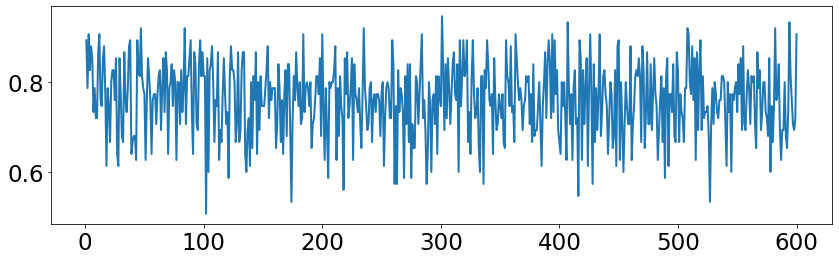

In [46]:
data = 'mini_test'
bs = '5shot'
path = "./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_00{}_head_default/".format(data, bs)
train_acc = pd.read_csv(path+"train_history.csv", index_col='Unnamed: 0')
test_acc = pd.read_csv(path+"test_history_cutmix3.csv", index_col='Unnamed: 0')
print('Testing Accuracy of baseline {:.2f} ± {:.2f}'.format(test_acc.mean()[-1] * 100,
                                         1.96 * test_acc.std()[-1] / np.sqrt(600) * 100))
# episode = 102# up to 600
# fig = plt.figure(figsize=(18,6))
# plt.plot(train_acc.loc[episode]*100, label='train accuracy'.format(episode))
# plt.plot(test_acc.loc[episode]*100, label='test accuracy'.format(episode))
# plt.xticks(np.arange(-1, 100, 10), fontsize = 15)
# plt.yticks(fontsize = 20)
# plt.ylabel("Accuracy", fontsize=20)
# plt.legend(fontsize=20, loc=1)
# plt.show()
# plt.close()
test_acc.iloc[:,-1].plot() # cutmix3 

<AxesSubplot:>

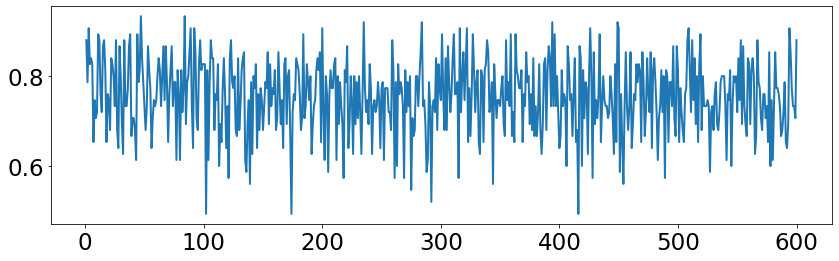

In [45]:
test_acc.iloc[:,-1].plot() # cutmix2 75.46 ± 0.66

Text(0.5, 1.0, 'chest')

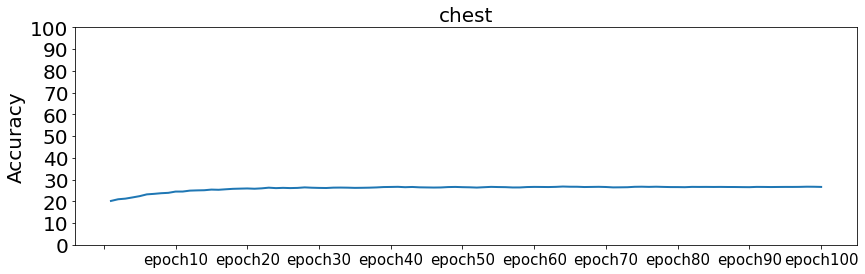

In [85]:
plt.plot(test_acc.mean()*100)
plt.xticks(np.arange(-1, 100, 10), fontsize = 15)
plt.yticks(np.arange(0, 101, 10), fontsize = 20)
plt.ylabel("Accuracy", fontsize=20)
plt.title(data, fontsize=20)

In [86]:
result = pd.DataFrame(None, index=datas, columns=['1shot', '5shot'])
for data in result.index:
    for bs in result.columns:
        path = "./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_00{}_head_default/".format(data, bs)
        test_acc = pd.read_csv(path+"test_history_strong_aug.csv", index_col='Unnamed: 0')
        acc = '{:.2f} ± {:.2f}'.format(test_acc.mean()[-1] * 100,
                                         1.96 * test_acc.std()[-1] / np.sqrt(600) * 100)
        result.loc[data][bs] = acc
display(result)

,1shot,5shot
mini_test,51.45 ± 0.80,75.54 ± 0.60
crop,59.84 ± 0.99,87.33 ± 0.59
euro,54.95 ± 0.82,78.80 ± 0.59
isic,30.11 ± 0.53,43.28 ± 0.59
chest,22.00 ± 0.34,25.91 ± 0.41
